In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import math

np.random.seed(0)

delta=0.2 # difference between means of compared distributions
groupsize = 10
nsimulations = 200
nbootstraps = 100
colors = mcolors.CSS4_COLORS

def p_skew(delta):
    group1 = np.random.lognormal(0, 1, groupsize)
    group2 = np.random.lognormal(delta, 1, groupsize)
    p=scipy.stats.ttest_ind(group1, group2).pvalue

    pvalues=[scipy.stats.ttest_ind(np.random.choice(group1, size=math.floor(groupsize), replace=True),
                                  np.random.choice(group2, size=math.floor(groupsize), replace=True)).pvalue for j in range(nbootstraps)]
    skew = scipy.stats.skew(pvalues)
    kurtosis = scipy.stats.kurtosis(pvalues)
    std = np.std(pvalues)
    mean = np.mean(pvalues)
    return p, mean, std, skew, kurtosis

no_effect = [p_skew(0) for i in range(nsimulations)]
effect = [p_skew(delta) for i in range(nsimulations)]
#for i in range(nsimulations)]

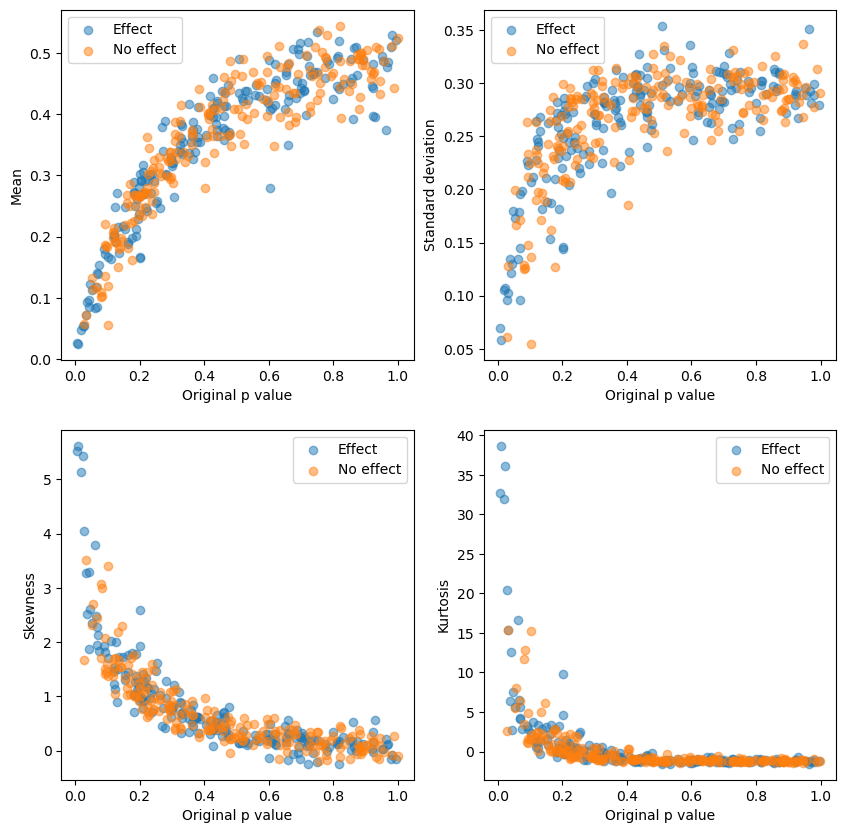

In [2]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(10)

y_labels = ['Mean', 'Standard deviation', 'Skewness', 'Kurtosis']

for i, label in enumerate(y_labels):
    axes[i//2,i%2].scatter([x[0] for x in effect], [x[i+1] for x in effect], label='Effect', alpha=0.5)
    axes[i//2,i%2].scatter([x[0] for x in no_effect], [x[i+1] for x in no_effect], label='No effect', alpha=0.5)
    axes[i//2,i%2].set_xlabel('Original p value')
    axes[i//2,i%2].set_ylabel(label)
    axes[i//2,i%2].legend()
plt.show()